In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import seaborn as sns

pd.options.display.float_format = '{:.5f}'.format # Suprimo notación científica

datos = pd.read_csv("../Entrenamieto_ECI_2020.csv")

datos.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,5272800.00000,EUR,5272800.00000,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,48230.00000,EUR,48230.00000,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,83865.60000,USD,83865.60000,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,7421881.50000,USD,7421881.50000,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,13357192.50000,USD,13357192.50000,Closed Lost,Prod_Category_A_None


## Analizo Cantidad por Tipo de Oportunidad

In [2]:
amount_filtered = datos[datos['Stage'] == 'Closed Won']
amount_filtered = amount_filtered[['Opportunity_Type', 'Stage', 'Total_Amount']]
amount_filtered.head()

,Opportunity_Type,Stage,Total_Amount
1,Opportunity_Type_1,Closed Won,48230.00000
2,Opportunity_Type_1,Closed Won,83865.60000
7,Opportunity_Type_1,Closed Won,50688.00000
23,Opportunity_Type_19,Closed Won,1621851.00000
63,Opportunity_Type_8,Closed Won,103350.00000


In [3]:
op_count = datos['Opportunity_Type'].value_counts().to_frame().reset_index().\
           rename(columns={'Opportunity_Type':'Count', 'index':'Opportunity_Type'})
op_count.head()

,Opportunity_Type,Count
0,Opportunity_Type_1,6819
1,Opportunity_Type_7,5763
2,Opportunity_Type_19,1900
3,Opportunity_Type_8,1458
4,Opportunity_Type_12,279


Text(0.5, 0, 'Tipo de Oportunidad')

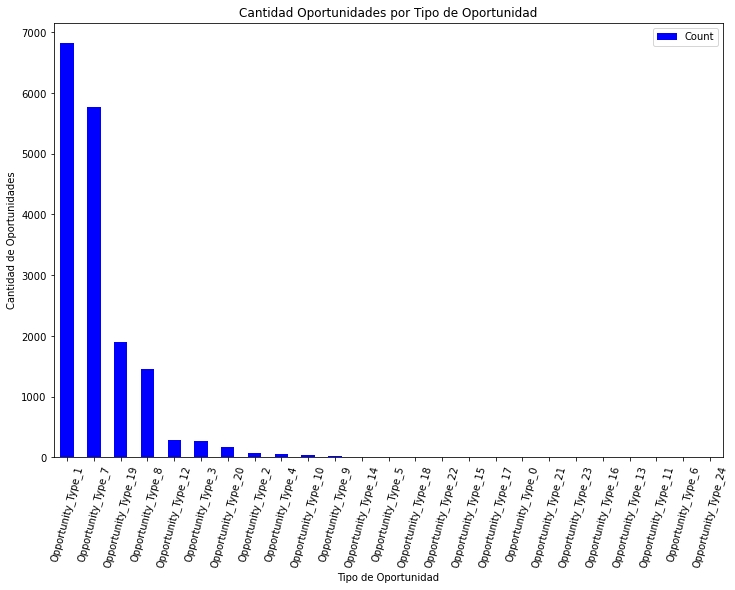

In [4]:
count_for_bars = op_count[['Opportunity_Type', 'Count']].set_index('Opportunity_Type').sort_values(by='Count', ascending=False)
count_for_bars.plot(kind='bar', figsize=(12, 8), title='Cantidad Oportunidades por Tipo de Oportunidad', color='blue', rot=75)

ax = plt.gca()
ax.set_ylabel('Cantidad de Oportunidades')
ax.set_xlabel('Tipo de Oportunidad')

Text(0.5, 0, 'Tipo de Oportunidad')

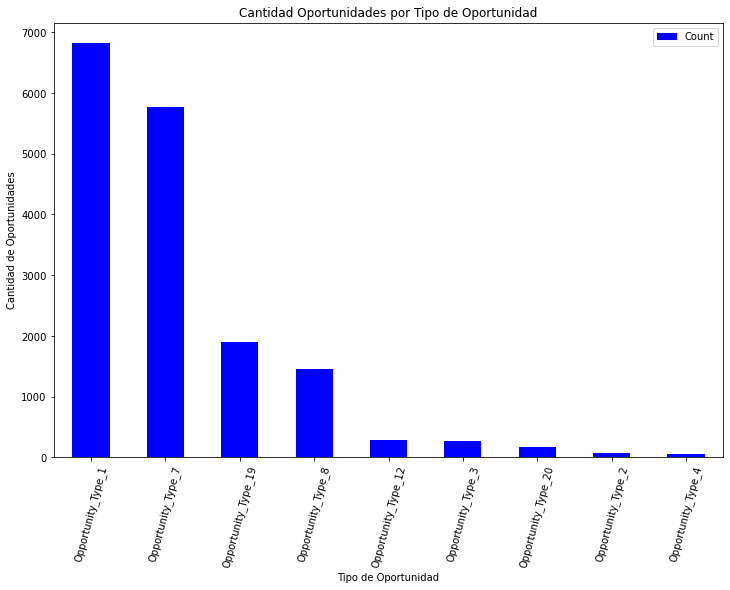

In [5]:
# Filtro aquellas que tengan al menos 50
count_for_bars_50 = op_count[op_count['Count']>50][['Opportunity_Type', 'Count']].set_index('Opportunity_Type').sort_values(by='Count', ascending=False)
count_for_bars_50.plot(kind='bar', figsize=(12, 8), title='Cantidad Oportunidades por Tipo de Oportunidad', color='blue', rot=75)

ax = plt.gca()
ax.set_ylabel('Cantidad de Oportunidades')
ax.set_xlabel('Tipo de Oportunidad')

## Analizo Promedio Ganadas por Tipo de Oportunidad

In [6]:
won_count = amount_filtered['Opportunity_Type'].value_counts().to_frame().reset_index().\
            rename(columns={'Opportunity_Type':'Won_Count','index':'Opportunity_Type'})
won_count.head()

,Opportunity_Type,Won_Count
0,Opportunity_Type_7,3941
1,Opportunity_Type_1,3617
2,Opportunity_Type_8,1024
3,Opportunity_Type_19,399
4,Opportunity_Type_12,259


In [7]:
merged = op_count.merge(won_count)
merged['mean'] = merged['Won_Count'] / merged['Count']
merged

,Opportunity_Type,Count,Won_Count,mean
0,Opportunity_Type_1,6819,3617,0.53043
1,Opportunity_Type_7,5763,3941,0.68385
2,Opportunity_Type_19,1900,399,0.21000
3,Opportunity_Type_8,1458,1024,0.70233
4,Opportunity_Type_12,279,259,0.92832
5,Opportunity_Type_3,275,141,0.51273
6,Opportunity_Type_20,175,36,0.20571
7,Opportunity_Type_2,70,23,0.32857
8,Opportunity_Type_4,51,21,0.41176
9,Opportunity_Type_10,34,24,0.70588


Text(0.5, 0, 'Tipo de Oportunidad')

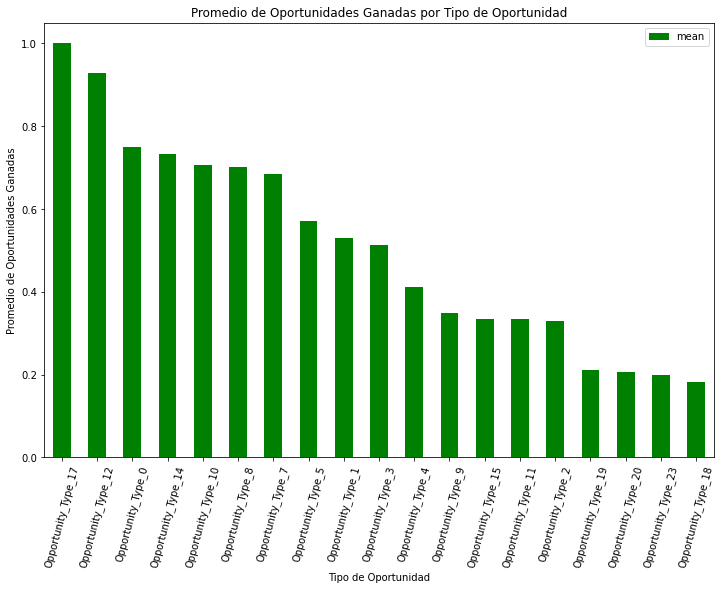

In [8]:
mean_for_bars = merged[['Opportunity_Type', 'mean']].set_index('Opportunity_Type').sort_values(by='mean', ascending=False)
mean_for_bars.plot(kind='bar', figsize=(12, 8), title='Promedio de Oportunidades Ganadas por Tipo de Oportunidad', color='green', rot=75)

ax = plt.gca()
ax.set_ylabel('Promedio de Oportunidades Ganadas')
ax.set_xlabel('Tipo de Oportunidad')

Text(0.5, 0, 'Tipo de Oportunidad')

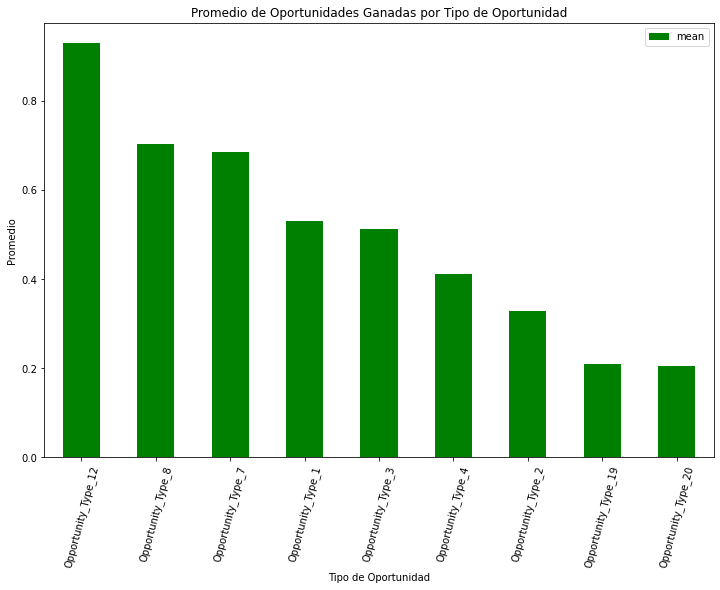

In [9]:
# Muestro únicamente aquellos que tienen al menos 50 oportunidades
mean_for_bars_50 = merged[merged['Count']>50][['Opportunity_Type', 'mean']].set_index('Opportunity_Type').sort_values(by='mean', ascending=False)
mean_for_bars_50.plot(kind='bar', figsize=(12, 8), title='Promedio de Oportunidades Ganadas por Tipo de Oportunidad', color='green', rot=75)

ax = plt.gca()
ax.set_ylabel('Promedio')
ax.set_xlabel('Tipo de Oportunidad')

## Analizo Monto Total, Tipo de Oportunidad y Promedio de Ganadas

In [10]:
d = datos[['Opportunity_Type', 'ASP_Currency', 'ASP', 'ASP_(converted)_Currency', 'ASP_(converted)', 'Total_Amount', 'Total_Amount_Currency']]
d2 = datos[['Opportunity_Type', 'Total_Amount']].groupby('Opportunity_Type').mean().reset_index().rename(columns={'Total_Amount': 'mean'})
dm = d.merge(d2, on='Opportunity_Type')

dm

#datos[['ASP_Currency', 'ASP', 'ASP_(converted)_Currency', 'ASP_(converted)', 'Total_Amount', 'Total_Amount_Currency']].groupby('ASP_Currency').mean()

,Opportunity_Type,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Total_Amount,Total_Amount_Currency,mean
0,Opportunity_Type_1,EUR,0.52000,USD,0.58817,5272800.00000,EUR,1841257.12359
1,Opportunity_Type_1,EUR,0.53000,USD,0.59948,48230.00000,EUR,1841257.12359
2,Opportunity_Type_1,USD,0.48000,USD,0.48000,83865.60000,USD,1841257.12359
3,Opportunity_Type_1,USD,0.48000,USD,0.48000,50688.00000,USD,1841257.12359
4,Opportunity_Type_1,USD,0.55000,USD,0.55000,221650.00000,USD,1841257.12359
...,...,...,...,...,...,...,...,...
16942,Opportunity_Type_16,EUR,0.25000,USD,0.28277,374625.00000,EUR,332126.32500
16943,Opportunity_Type_16,EUR,0.28500,USD,0.32236,427465.80000,EUR,332126.32500
16944,Opportunity_Type_16,EUR,0.36000,USD,0.40719,114048.00000,EUR,332126.32500
16945,Opportunity_Type_16,EUR,0.26500,USD,0.29974,412366.50000,EUR,332126.32500
